# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [507]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import urllib.request
import matplotlib.pyplot as plt

## 2. Datos

In [508]:
df = pd.read_csv("./data/train.csv")



In [509]:
train = pd.read_csv("./data/train.csv")
test  = pd.read_csv("./data/test.csv")
sample_sub = pd.read_csv("./data/sample_submission.csv")

print("train:", train.shape)
print("test:", test.shape)
print("sample:", sample_sub.shape)
train.head()


train: (912, 13)
test: (391, 12)
sample: (391, 2)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


### 2.1 Exploración de los datos

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [511]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [512]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
911,229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [513]:
df.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


In [514]:
df.isna().sum().sort_values(ascending=False).head(20)



laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_euros      0
dtype: int64

In [515]:
df.duplicated().sum()


np.int64(0)

In [516]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
laptop_ID,912.0,NaN,NaN,NaN,650.3125,382.727748,2.0,324.75,636.5,982.25,1320.0
Company,912,19,Lenovo,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,912,480,XPS 13,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,912,6,Notebook,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,912.0,NaN,NaN,NaN,14.981579,1.436719,10.1,14.0,15.6,15.6,18.4
ScreenResolution,912,36,Full HD 1920x1080,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,912,107,Intel Core i5 7200U 2.5GHz,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,912,9,8GB,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,912,37,256GB SSD,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gpu,912,93,Intel HD Graphics 620,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [517]:
target = "Price_in_euros"

df[target].describe()


count     912.000000
mean     1111.724090
std       687.959172
min       174.000000
25%       589.000000
50%       978.000000
75%      1483.942500
max      6099.000000
Name: Price_in_euros, dtype: float64

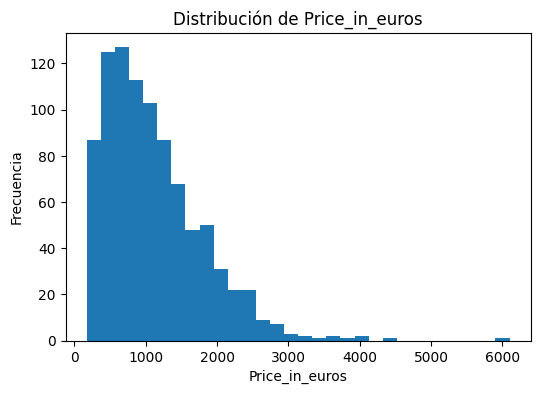

In [518]:
plt.figure(figsize=(6,4))
plt.hist(df[target], bins=30)
plt.title("Distribución de Price_in_euros")
plt.xlabel("Price_in_euros")
plt.ylabel("Frecuencia")
plt.show()


In [519]:
#  Aquí solo creamos columnas más “analizables” (numéricas). No borramos las originales.
df_eda = df.copy()

# RAM: "8GB" -> 8
df_eda["Ram_GB"] = df_eda["Ram"].str.replace("GB", "", regex=False).astype(float)

# Weight: "1.86kg" -> 1.86
df_eda["Weight_kg"] = df_eda["Weight"].str.replace("kg", "", regex=False).astype(float)

# ScreenResolution: extraer ancho y alto
wh = df_eda["ScreenResolution"].str.extract(r'(?P<width>\d+)\s*x\s*(?P<height>\d+)')
df_eda["Screen_Width"]  = wh["width"].astype(float)
df_eda["Screen_Height"] = wh["height"].astype(float)

# PPI
df_eda["PPI"] = np.sqrt(df_eda["Screen_Width"]**2 + df_eda["Screen_Height"]**2) / df_eda["Inches"]

# Flags
df_eda["Touchscreen"] = df_eda["ScreenResolution"].str.contains("Touchscreen", case=False, na=False).astype(int)
df_eda["IPS_Panel"]   = df_eda["ScreenResolution"].str.contains("IPS", case=False, na=False).astype(int)

# CPU: marca y GHz
df_eda["Cpu_Brand"] = df_eda["Cpu"].str.split().str[0]
df_eda["Cpu_GHz"] = df_eda["Cpu"].str.extract(r'(\d+(\.\d+)?)\s*GHz')[0].astype(float)

# GPU: marca
df_eda["Gpu_Brand"] = df_eda["Gpu"].str.split().str[0]

df_eda[["Ram", "Ram_GB", "Weight", "Weight_kg", "ScreenResolution", "PPI", "Cpu", "Cpu_GHz"]].head()


,Ram,Ram_GB,Weight,Weight_kg,ScreenResolution,PPI,Cpu,Cpu_GHz
0,8GB,8.0,1.86kg,1.86,Full HD 1920x1080,141.211998,Intel Core i3 6006U 2GHz,2.0
1,16GB,16.0,2.59kg,2.59,Full HD 1920x1080,141.211998,Intel Core i7 6700HQ 2.6GHz,2.6
2,8GB,8.0,2.04kg,2.04,Full HD 1920x1080,141.211998,Intel Core i7 7500U 2.7GHz,2.7
3,8GB,8.0,1.34kg,1.34,1440x900,127.677940,Intel Core i5 1.8GHz,1.8
4,4GB,4.0,2.25kg,2.25,Full HD 1920x1080,141.211998,Intel Core i3 6006U 2.0GHz,2.0


In [520]:
# Correlación con el target (solo numéricas)
num_cols = df_eda.select_dtypes(include=[np.number]).columns

corr_target = df_eda[num_cols].corr()[target].drop(target)

# Ordenar por valor absoluto 
corr_target = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

corr_target.head(15)


Ram_GB           0.738922
Screen_Height    0.543591
Screen_Width     0.542660
PPI              0.459478
Cpu_GHz          0.427116
IPS_Panel        0.267188
Touchscreen      0.218089
Weight_kg        0.197086
Inches           0.071043
laptop_ID        0.023643
Name: Price_in_euros, dtype: float64

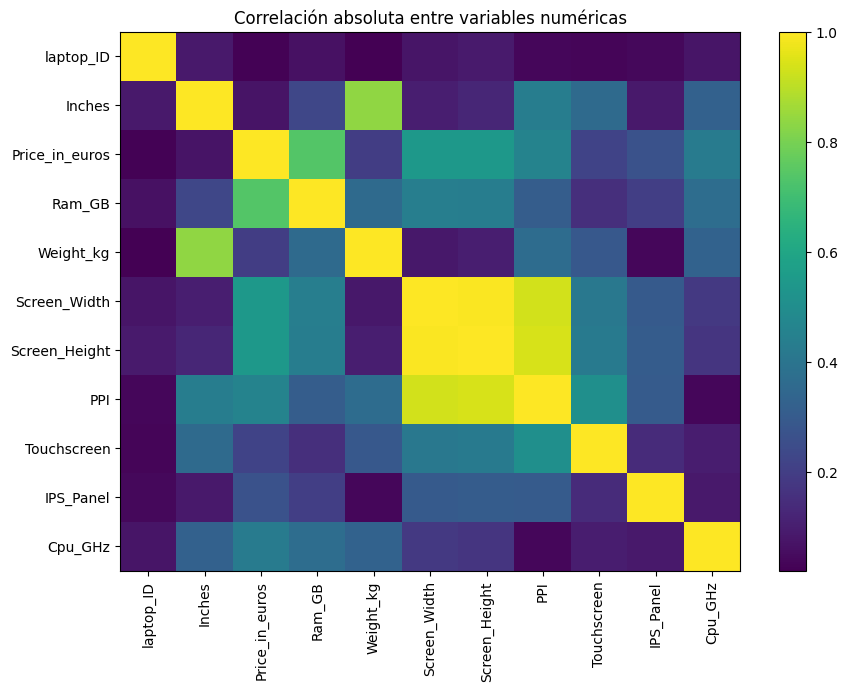

In [521]:
# Colinealidad usando correlacion entre Features
corr_matrix = df_eda[num_cols].corr().abs()

plt.figure(figsize=(10,7))
plt.imshow(corr_matrix, aspect="auto")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlación absoluta entre variables numéricas")
plt.show()


In [522]:
# Ver variables categóricas
cat_cols = df.select_dtypes(include="object").columns

cat_cols



Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [523]:
df_corr = df_eda.copy()


In [524]:
# Matriz de correlación SOLO numérica
num_cols = df_corr.select_dtypes(include=np.number).columns

corr_matrix = df_corr[num_cols].corr()


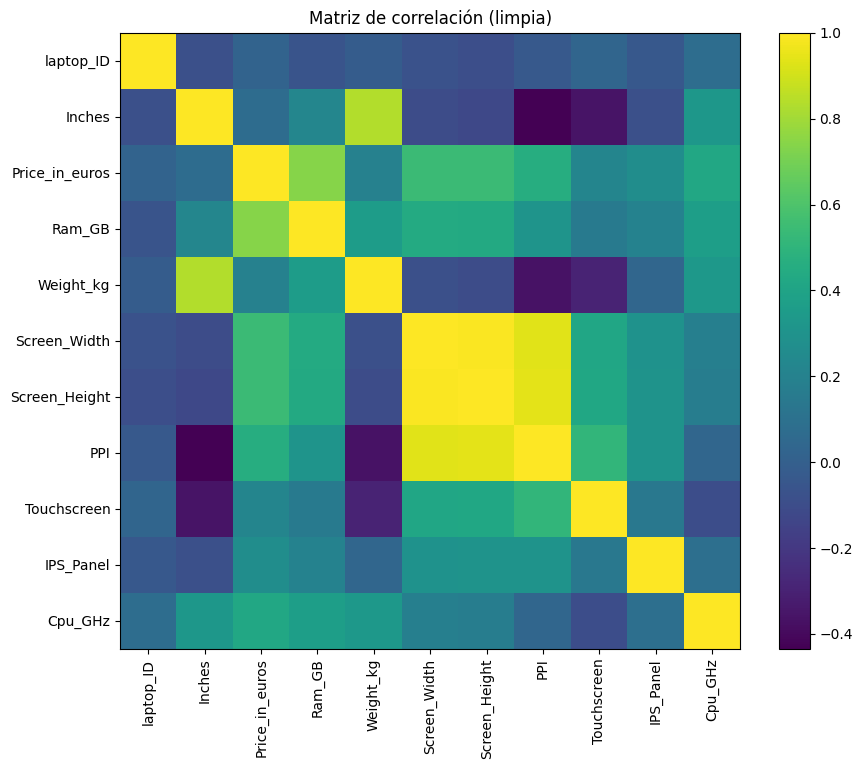

In [525]:
plt.figure(figsize=(10,8))

plt.imshow(corr_matrix, aspect="auto")
plt.colorbar()

plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)

plt.title("Matriz de correlación (limpia)")

plt.show()


In [526]:
# correlación entre variables numéricas y el target 
num_cols = df_corr.select_dtypes(include=np.number).columns


In [527]:
corr_target = df_corr[num_cols].corr()[target]

# quitar el propio target
corr_target = corr_target.drop(target)

# ordenar por importancia (valor absoluto)
corr_target = corr_target.reindex(
    corr_target.abs().sort_values(ascending=False).index
)

corr_target.head(15)


Ram_GB           0.738922
Screen_Height    0.543591
Screen_Width     0.542660
PPI              0.459478
Cpu_GHz          0.427116
IPS_Panel        0.267188
Touchscreen      0.218089
Weight_kg        0.197086
Inches           0.071043
laptop_ID        0.023643
Name: Price_in_euros, dtype: float64

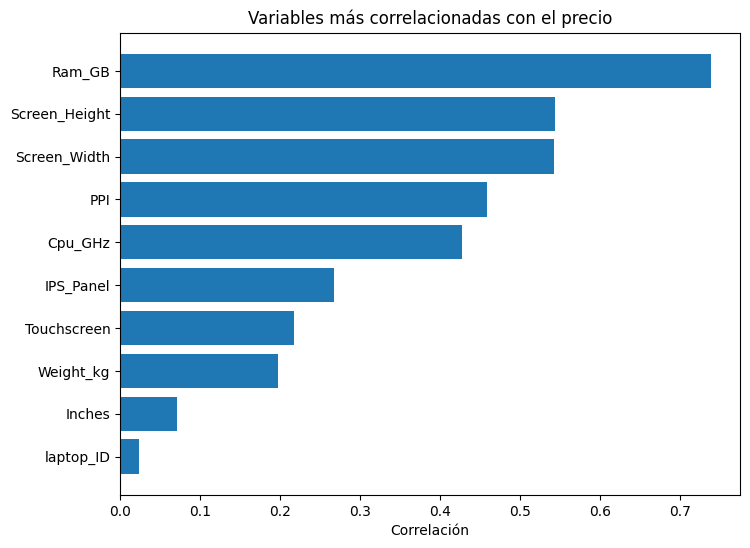

In [528]:
plt.figure(figsize=(8,6))

plt.barh(corr_target.index[:15], corr_target.values[:15])

plt.title("Variables más correlacionadas con el precio")
plt.xlabel("Correlación")
plt.gca().invert_yaxis()

plt.show()


### 2.3 Definir X e y

In [529]:
# Definir target
target = "Price_in_euros"

# X = todas las columnas excepto el target
X = df.drop(columns=[target])

# y = target
y = df[target].copy()

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (912, 12)
Shape y: (912,)


### 2.4 Dividir X_train, X_test, y_train, y_test

In [530]:
from sklearn.model_selection import train_test_split

# División train / test (validación interna)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,   # 20% para test interno
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (729, 12)
X_test : (183, 12)
y_train: (729,)
y_test : (183,)


In [531]:
def feature_engineering(df):

    df = df.copy()

    # RAM: "8GB" -> 8
    df["Ram_GB"] = df["Ram"].str.replace("GB","", regex=False).astype(float)

    # Weight: "1.86kg" -> 1.86
    df["Weight_kg"] = df["Weight"].str.replace("kg","", regex=False).astype(float)

    # ScreenResolution -> width y height
    wh = df["ScreenResolution"].str.extract(r'(?P<width>\d+)\s*x\s*(?P<height>\d+)')

    df["Screen_Width"] = wh["width"].astype(float)
    df["Screen_Height"] = wh["height"].astype(float)

    # PPI
    df["PPI"] = np.sqrt(df["Screen_Width"]**2 + df["Screen_Height"]**2) / df["Inches"]

    # Flags
    df["Touchscreen"] = df["ScreenResolution"].str.contains("Touchscreen", case=False, na=False).astype(int)
    df["IPS_Panel"] = df["ScreenResolution"].str.contains("IPS", case=False, na=False).astype(int)

    # CPU GHz
    df["Cpu_GHz"] = df["Cpu"].str.extract(r'(\d+(\.\d+)?)\s*GHz')[0].astype(float)

    return df


In [532]:
# Feature Engineering

# Aplicar FE SOLO después del split

X_train_fe = feature_engineering(X_train)
X_test_fe  = feature_engineering(X_test)


In [533]:
# aplicar get_dummies a train y test
X_train_encoded = pd.get_dummies(X_train_fe, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test_fe, drop_first=True)


In [534]:
# alinear columnas
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join="left",
    axis=1,
    fill_value=0
)


In [535]:
print("X_train_encoded:", X_train_encoded.shape)
print("X_test_encoded :", X_test_encoded.shape)

print("Columnas iguales:", (X_train_encoded.columns == X_test_encoded.columns).all())


X_train_encoded: (729, 839)
X_test_encoded : (183, 839)
Columnas iguales: True


Se aplica OneHotEncoding a las variables categóricas. Posteriormente se alinean las columnas entre train y test para asegurar que ambos conjuntos tengan exactamente las mismas features.

## 3. Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


In [536]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Crear modelo baseline
rf_model = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# Entrenar
rf_model.fit(X_train_encoded, y_train)

# Predicciones en test interno
predictions = rf_model.predict(X_test_encoded)

# Métrica RMSE
rmse = root_mean_squared_error(y_test, predictions)

print("RMSE baseline:", rmse)


RMSE baseline: 340.8931050956831


### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [537]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Calcular métricas

rmse = root_mean_squared_error(y_test, predictions)
mae  = mean_absolute_error(y_test, predictions)
r2   = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


RMSE: 340.8931050956831
MAE : 208.3859688524591
R2  : 0.7903197311500856


### 4.3 Optimización (up to you 🫰🏻)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [538]:
X_pred = pd.read_csv("./data/test.csv")
X_pred.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [539]:
X_pred.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
390,421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [540]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [541]:
X_pred_fe = feature_engineering(test)


In [542]:
# 1) aplicar FE al test
X_pred_fe = feature_engineering(test)

# 2) dummies
X_pred = pd.get_dummies(X_pred_fe, drop_first=True)

# 3) alinear con train
X_pred_aligned = X_pred.reindex(columns=X_train_encoded.columns, fill_value=0)

# 4) predecir
predictions_submit = rf_model.predict(X_pred_aligned)

len(predictions_submit)


391

In [543]:
X_pred

,laptop_ID,Inches,Ram_GB,Weight_kg,Screen_Width,Screen_Height,PPI,Touchscreen,IPS_Panel,Cpu_GHz,...,Weight_3.78kg,Weight_3.8kg,Weight_3kg,Weight_4.0kg,Weight_4.2kg,Weight_4.36kg,Weight_4.3kg,Weight_4.42kg,Weight_4.6kg,Weight_4kg
0,209,15.6,16.0,2.400,1920.0,1080.0,141.211998,0,0,2.8,...,False,False,False,False,False,False,False,False,False,False
1,1281,15.6,4.0,2.400,1366.0,768.0,100.454670,0,0,1.6,...,False,False,False,False,False,False,False,False,False,False
2,1168,15.6,4.0,1.900,1366.0,768.0,100.454670,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
3,1231,15.6,8.0,2.191,1920.0,1080.0,141.211998,1,1,2.5,...,False,False,False,False,False,False,False,False,False,False
4,1020,14.0,4.0,1.950,1920.0,1080.0,157.350512,0,0,2.5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,820,17.3,16.0,2.900,1920.0,1080.0,127.335675,0,0,2.8,...,False,False,False,False,False,False,False,False,False,False
387,948,14.0,4.0,1.470,1920.0,1080.0,157.350512,0,1,2.3,...,False,False,False,False,False,False,False,False,False,False
388,483,15.6,8.0,1.780,1920.0,1080.0,141.211998,0,0,2.8,...,False,False,False,False,False,False,False,False,False,False
389,1017,14.0,4.0,1.640,1366.0,768.0,111.935204,0,0,2.5,...,False,False,False,False,False,False,False,False,False,False


In [544]:
predictions_submit = rf_model.predict(X_pred_aligned)
predictions_submit[:5]


array([1576.099 ,  293.9317,  389.4602, 1051.3667, 1011.1094])

In [545]:
len(predictions_submit)


391

**¡OJO! ¿Por qué me da error?**

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [546]:
# ¿Qué opináis?
# ¿Sí, no?

![wow.jpeg](attachment:wow.jpeg)

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [556]:
# 1) reconstruir sample limpio (variable que usa el chequeador)
sample = pd.read_csv("./data/sample_submission.csv")

# 2) reconstruir submission desde la plantilla
submission = sample.copy()

# 3) meter predicciones (asegúrate de que predictions_submit existe y tiene 391 valores)
price_col = [c for c in submission.columns if "price" in c.lower()][0]
submission[price_col] = predictions_submit

print("sample shape:", sample.shape)
print("submission shape:", submission.shape)
print("IDs iguales:", submission["laptop_ID"].equals(sample["laptop_ID"]))
submission.head()


sample shape: (391, 2)
submission shape: (391, 2)
IDs iguales: True


,laptop_ID,Price_in_euros
0,209,1576.0990
1,1281,293.9317
2,1168,389.4602
3,1231,1051.3667
4,1020,1011.1094


In [557]:
sample = pd.read_csv("./data/sample_submission.csv")  # IMPORTANTÍSIMO: el chequeador usa 'sample'
print("sample shape:", sample.shape)
print(sample.head())


sample shape: (391, 2)
   laptop_ID  Price_in_euros
0        209          1949.1
1       1281           805.0
2       1168          1101.0
3       1231          1293.8
4       1020          1832.6


In [558]:
submission = sample.copy()

price_col = [c for c in submission.columns if "price" in c.lower()][0]
submission[price_col] = predictions_submit

print("submission shape:", submission.shape)
print(submission.head())


submission shape: (391, 2)
   laptop_ID  Price_in_euros
0        209       1576.0990
1       1281        293.9317
2       1168        389.4602
3       1231       1051.3667
4       1020       1011.1094


## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [550]:
#¿Cómo creamos la submission?
submission = pd.DataFrame()

In [551]:
submission.head()

""


In [552]:
submission.shape

(0, 0)

In [553]:
print("sample shape:", sample.shape)
print("submission shape:", submission.shape)

print(sample.columns)
print(submission.columns)


sample shape: (391, 2)
submission shape: (0, 0)
Index(['laptop_ID', 'Price_in_euros'], dtype='object')
RangeIndex(start=0, stop=0, step=1)


## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [560]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [561]:
chequeador(submission)

You're ready to submit!
